In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
df=pd.read_csv(r"D:\new\soptify_data_analysis\spotify_songs_dataset.csv")
df.head()

,song_id,song_title,artist,album,genre,release_date,duration,popularity,stream,language,explicit_content,label,composer,producer,collaboration
0,SP0001,Space executive series.,Sydney Clark,What.,Electronic,1997-11-08,282.0,42,35055874,English,Yes,Def Jam,Amy Hatfield,Jeffrey Weaver,NaN
1,SP0002,Price last painting.,Connor Peters DDS,Nature politics.,Electronic,2015-05-10,127.0,50,9249527,English,Yes,Universal Music,Jason Gregory,Kenneth White,NaN
2,SP0003,Piece.,Anna Keith,Visit.,Pop,2024-07-08,NaN,10,76669110,English,Yes,Universal Music,Rachel Lopez,Jason Barnes,NaN
3,SP0004,Power industry your.,Zachary Simpson,Behavior evening.,Hip-Hop,2022-08-15,214.0,86,34732016,English,No,Sony Music,Thomas Li,Mrs. Becky Palmer,NaN
4,SP0005,Food animal second.,Christopher Mcgee,Front.,Pop,2023-03-05,273.0,63,96649372,English,Yes,Def Jam,Adam Wagner,Beverly Baker,NaN


In [6]:
df.columns

Index(['song_id', 'song_title', 'artist', 'album', 'genre', 'release_date',
       'duration', 'popularity', 'stream', 'language', 'explicit_content',
       'label', 'composer', 'producer', 'collaboration'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_id           50000 non-null  object 
 1   song_title        50000 non-null  object 
 2   artist            50000 non-null  object 
 3   album             50000 non-null  object 
 4   genre             50000 non-null  object 
 5   release_date      50000 non-null  object 
 6   duration          45000 non-null  float64
 7   popularity        50000 non-null  int64  
 8   stream            50000 non-null  int64  
 9   language          47500 non-null  object 
 10  explicit_content  50000 non-null  object 
 11  label             50000 non-null  object 
 12  composer          50000 non-null  object 
 13  producer          50000 non-null  object 
 14  collaboration     15000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 5.7+ MB


In [9]:
df.describe()

,duration,popularity,stream
count,45000.000000,50000.000000,5.000000e+04
mean,239.659178,50.783440,5.019183e+07
std,50.136727,28.948749,2.893624e+07
min,33.000000,1.000000,1.899000e+03
25%,206.000000,26.000000,2.523311e+07
50%,240.000000,51.000000,5.042169e+07
75%,273.000000,76.000000,7.519064e+07
max,433.000000,100.000000,9.999913e+07


### Handling missing values

In [10]:
print(df.isnull().sum())

song_id                 0
song_title              0
artist                  0
album                   0
genre                   0
release_date            0
duration             5000
popularity              0
stream                  0
language             2500
explicit_content        0
label                   0
composer                0
producer                0
collaboration       35000
dtype: int64


In [11]:
df.dropna(inplace=True)

#### date time conversion

In [13]:
df['release_date']=pd.to_datetime(df['release_date'])

#### removing dublicate values

In [15]:
df.drop_duplicates(inplace=True)

### Univariate Analysis

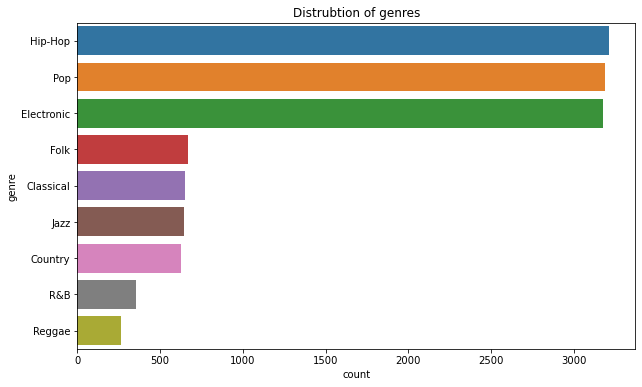

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(y='genre',data=df,order=df['genre'].value_counts().index)
plt.title("Distrubtion of genres")
plt.show()

Number of Yes: 12794
Number of No: 12794


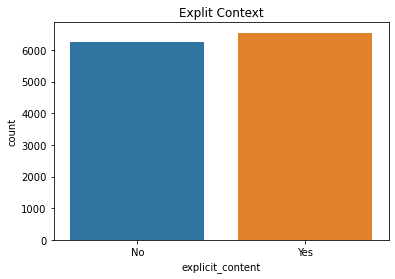

In [22]:
print("Number of Yes:",len(df['explicit_content']=='Yes'))
print("Number of No:",len(df['explicit_content']=='No'))

sns.countplot(x=df['explicit_content'])
plt.title("Explit Context")
plt.show()

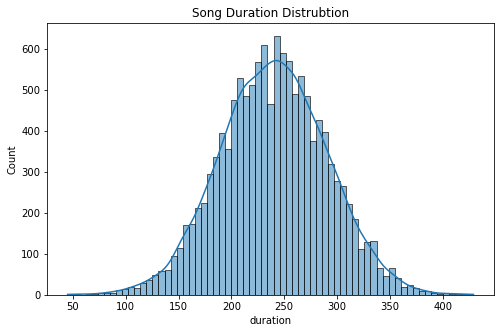

In [27]:
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], kde=True)
plt.title("Song Duration Distrubtion")
plt.show()

In [25]:
print("Duration Analysis")
df['duration'].describe()

Duration Analysis


count    12794.000000
mean       239.912537
std         50.273030
min         45.000000
25%        206.000000
50%        240.000000
75%        274.000000
max        429.000000
Name: duration, dtype: float64

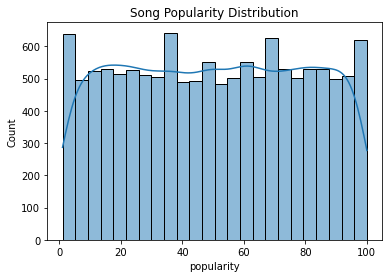

In [26]:
sns.histplot(df['popularity'], kde=True)
plt.title('Song Popularity Distribution')
plt.show()

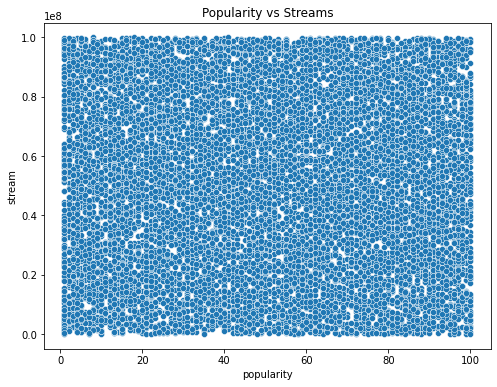

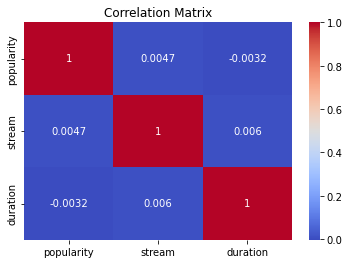

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='popularity', y='stream', data=df)
plt.title('Popularity vs Streams')
plt.show()

# Correlation matrix
corr = df[['popularity', 'stream', 'duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


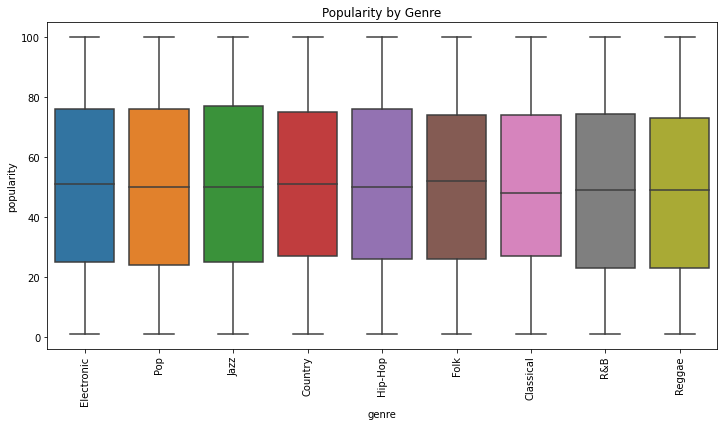

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='popularity', data=df)
plt.title('Popularity by Genre')
plt.xticks(rotation=90)
plt.show()


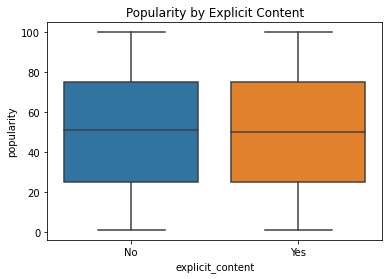

In [30]:
sns.boxplot(x='explicit_content', y='popularity', data=df)
plt.title('Popularity by Explicit Content')
plt.show()


### Time-Based Analysis

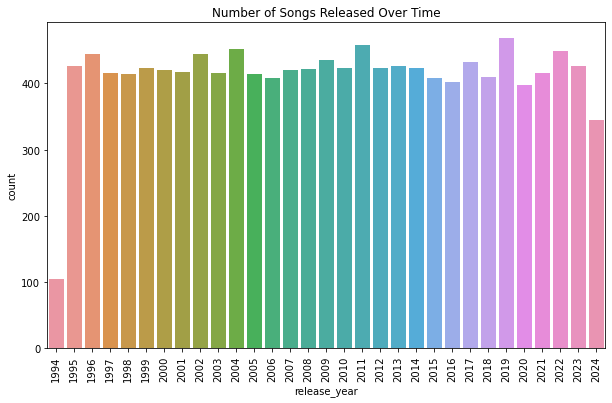

In [31]:
df['release_year'] = df['release_date'].dt.year
plt.figure(figsize=(10, 6))
sns.countplot(x='release_year', data=df)
plt.title('Number of Songs Released Over Time')
plt.xticks(rotation=90)
plt.show()


In [32]:
df['release_year'].describe()

count    12794.000000
mean      2009.284743
std          8.689236
min       1994.000000
25%       2002.000000
50%       2009.000000
75%       2017.000000
max       2024.000000
Name: release_year, dtype: float64

In [33]:
df.groupby('release_year')['popularity'].mean().reset_index()

,release_year,popularity
0,1994,52.257143
1,1995,49.805164
2,1996,49.002247
3,1997,53.593750
4,1998,49.460241
5,1999,51.498818
6,2000,50.154394
7,2001,49.203837
8,2002,49.725843
9,2003,48.524038


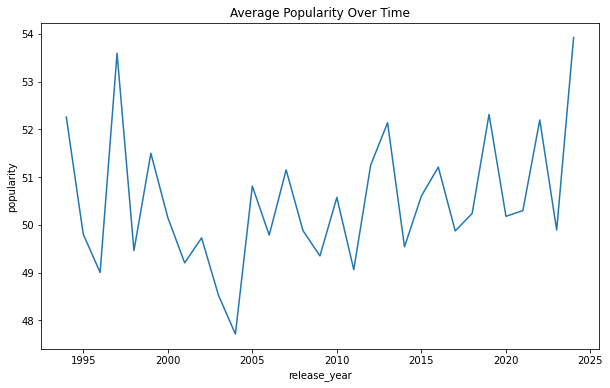

In [34]:
df_avg_popularity = df.groupby('release_year')['popularity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='release_year', y='popularity', data=df_avg_popularity)
plt.title('Average Popularity Over Time')
plt.show()


### Grouped and Aggregated Analysis


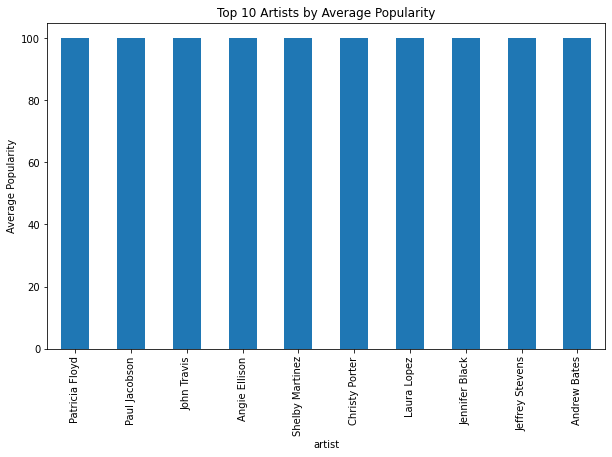

In [35]:
top_artists = df.groupby('artist')['popularity'].mean().sort_values(ascending=False).head(10)
top_artists.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Artists by Average Popularity')
plt.ylabel('Average Popularity')
plt.show()


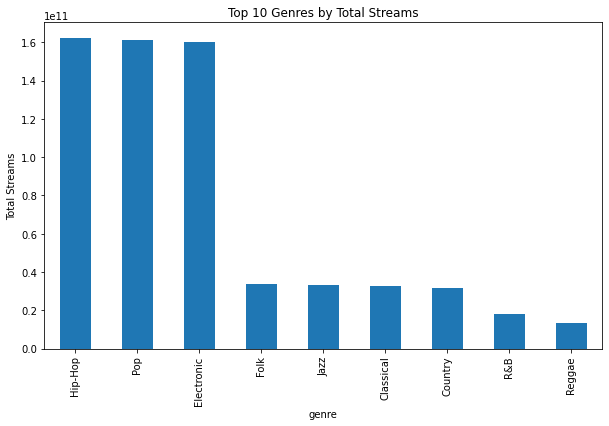

In [36]:
top_genres = df.groupby('genre')['stream'].sum().sort_values(ascending=False).head(10)
top_genres.plot(kind='bar', figsize=(10, 6))
plt.title('Top 10 Genres by Total Streams')
plt.ylabel('Total Streams')
plt.show()


### Clustering Songs Based on Features

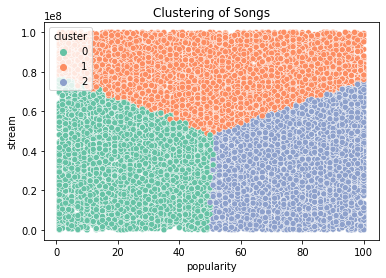

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['popularity', 'stream', 'duration']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
sns.scatterplot(x='popularity', y='stream', hue='cluster', data=df, palette='Set2')
plt.title('Clustering of Songs')
plt.show()
